In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split as tts,cross_val_score,ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score
import warnings
warnings.simplefilter('ignore')

In [44]:
df= pd.read_csv('C:\\Users\\Om Computers\\Downloads\\cap_stone_all_seen\\Capstone_project\\4seenshot\\LTV_df_Clusters.csv')

In [53]:
df.head()

,Unnamed: 0,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,DBM Order,Item Category,Net value,Order Quantity,year,month,c_TA_KM,Service_days,c_TA_SD,Total_Hrs
0,0,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,168303.0,P001,1203.14,73.0,2015,1,0,19,0,477.01
1,1,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,168303.0,P002,2348.75,6.5,2015,1,0,19,0,477.01
2,2,Retail,67849,00:00:00,7005200002,168303,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,168303.0,P010,500.06,1.0,2015,1,0,19,0,477.01
3,3,Retail,84419,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,173997.0,P001,804.26,170.0,2015,1,0,0,0,19.92
4,4,Retail,84419,00:00:00,7005200003,173997,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,173997.0,P011,197.03,1.0,2015,1,0,0,0,19.92


In [54]:
df.shape

(936235, 34)

# ltv on 2013

In [55]:
df_13=df[df["year"]==2013]

In [56]:
df_13.head(2)

,Unnamed: 0,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,DBM Order,Item Category,Net value,Order Quantity,year,month,c_TA_KM,Service_days,c_TA_SD,Total_Hrs
486477,486477,Retail,8302,00:00:00,7000019055,18856,23809,398.68,FORD,0.0,FIGO,0.0,Paid Service,13.33,400093,BC11,ANDHERI,NO,0.0,412.01,BC11FS1,2013-01-01 14:29:33,2013-01-01 12:30:48,01:58:45,18856.0,P001,398.68,1.0,2013,1,0,0,0,1.98
486478,486478,Retail,8302,00:00:00,7000019055,18856,23809,398.68,FORD,0.0,FIGO,0.0,Paid Service,13.33,400093,BC11,ANDHERI,NO,0.0,412.01,BC11FS1,2013-01-01 14:29:33,2013-01-01 12:30:48,01:58:45,18856.0,P002,13.33,1.0,2013,1,0,0,0,1.98


In [57]:
df_13.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Gate Pass Time',
       'Invoice No', 'Job Card No', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Print Status', 'Recovrbl Exp',
       'Total Amt Wtd Tax.', 'User ID', 'Invoice_DateTime', 'JobCard_DateTime',
       'Service_Time', 'DBM Order', 'Item Category', 'Net value',
       'Order Quantity', 'year', 'month', 'c_TA_KM', 'Service_days', 'c_TA_SD',
       'Total_Hrs'],
      dtype='object')

In [62]:
df_13_sot=df_13.groupby(["Customer No.","Make","Model"," ","c_TA_KM","Service_days","c_TA_SD"]).agg({"Invoice No":'nunique',"Total Amt Wtd Tax.":'mean',"Total_Hrs":'mean'}).reset_index()
df_13_sot_modl=df_13_sot.copy()

df_13_sot_modl["CLTV"] = df_13_sot_modl["Total Amt Wtd Tax."] / df_13_sot_modl["Invoice No"] 
df_13_sot_modl.head()



,Customer No.,Make,Model,c_TA_KM,Service_days,c_TA_SD,Invoice No,Total Amt Wtd Tax.,Total_Hrs,CLTV
0,1,MARUTI SUZUKI,OMNI,0,13,0,1,0.000000,321.370000,0.000000
1,10,GENERAL MOTORS,OPTRA,1,0,0,2,2557.822000,5.406000,1278.911000
2,1000,MARUTI SUZUKI,ALTO,0,0,0,2,1570.366667,3.696667,785.183333
3,10000,MARUTI SUZUKI,WAGONR,0,0,0,3,182.756667,13.626667,60.918889
4,10001,HONDA,CITY,0,0,0,4,3524.255556,7.762222,881.063889


In [65]:
df_13_sot_modl['CLTV'].describe()

count     46903.000000
mean       4365.372811
std        9645.539523
min           0.000000
25%         525.990000
50%        1731.320000
75%        4498.650000
max      343837.110000
Name: CLTV, dtype: float64

In [66]:
print(df_13_sot_modl[df_13_sot_modl["CLTV"]<=1731.320000].shape)
print(df_13_sot_modl[(df_13_sot_modl["CLTV"]>1731.320000)&(df_13_sot_modl["CLTV"]<=4498.650000)].shape)
print(df_13_sot_modl[df_13_sot_modl["CLTV"]>4498.650000].shape)

(23452, 10)
(11725, 10)
(11726, 10)


In [68]:
bins=[-1,1731.320000,4498.650000,343837.110000]
labels=["Low","Medium","High"]
df_13_sot_modl["CLTV_Cluster"]=pd.cut(df_13_sot_modl["CLTV"], bins=bins, labels=labels)

In [69]:
df_13_sot_modl["CLTV_Cluster"].value_counts(dropna=False)

Low       23452
High      11726
Medium    11725
Name: CLTV_Cluster, dtype: int64

In [70]:
df_13_sot_modl.dropna(inplace=True)

In [71]:
df_13_sot_modl_test=df_13_sot_modl.copy()

In [72]:
df_13_sot_modl_test.columns

Index(['Customer No.', 'Make', 'Model', 'c_TA_KM', 'Service_days', 'c_TA_SD',
       'Invoice No', 'Total Amt Wtd Tax.', 'Total_Hrs', 'CLTV',
       'CLTV_Cluster'],
      dtype='object')

In [73]:
le=LabelEncoder()
df_13_sot_modl_test["CLTV_Cluster"]=le.fit_transform(df_13_sot_modl_test["CLTV_Cluster"])
df_13_sot_modl_test["c_TA_SD"]=le.fit_transform(df_13_sot_modl_test["c_TA_SD"])
df_13_sot_modl_test["c_TA_KM"]=le.fit_transform(df_13_sot_modl_test["c_TA_KM"])
df_13_sot_modl_test["Make"]=le.fit_transform(df_13_sot_modl_test["Make"])
df_13_sot_modl_test["Model"]=le.fit_transform(df_13_sot_modl_test["Model"])

In [74]:
df_13_sot_modl_test.head()

,Customer No.,Make,Model,c_TA_KM,Service_days,c_TA_SD,Invoice No,Total Amt Wtd Tax.,Total_Hrs,CLTV,CLTV_Cluster
0,1,12,91,0,13,0,1,0.000000,321.370000,0.000000,1
1,10,6,95,1,0,0,2,2557.822000,5.406000,1278.911000,1
2,1000,12,11,0,0,0,2,1570.366667,3.696667,785.183333,1
3,10000,12,160,0,0,0,3,182.756667,13.626667,60.918889,1
4,10001,8,32,0,0,0,4,3524.255556,7.762222,881.063889,1


In [112]:
X=df_13_sot_modl_test.drop(["Customer No.","CLTV","CLTV_Cluster","Invoice No"],1)
y=df_13_sot_modl_test["CLTV_Cluster"]

In [113]:
list(X)

['Make',
 'Model',
 'c_TA_KM',
 'Service_days',
 'c_TA_SD',
 'Total Amt Wtd Tax.',
 'Total_Hrs']

In [114]:
len(X)

46903

In [115]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

### Decision Tree Classifier

In [116]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3600
           1       0.99      0.92      0.95      6963
           2       0.85      0.93      0.89      3508

    accuracy                           0.94     14071
   macro avg       0.93      0.95      0.94     14071
weighted avg       0.94      0.94      0.94     14071



In [117]:
print("Training Accuracy :" ,round(accuracy_score(y_test,y_pred_dt),2))
print("Testing Accuracy :" ,round(accuracy_score(y_train,y_pred_dt_train),2))

Training Accuracy : 0.94
Testing Accuracy : 0.95


In [118]:
### Cross Validation Score

dt_cv_score=cross_val_score(estimator=dt,X=X,y=y,cv=5)

print(round(dt_cv_score.mean(),2))

0.94


### Random Forest Classifier

In [119]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=8,random_state=0)

In [120]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=0)

In [121]:
y_pred_rfc=rfc.predict(X_test)

In [122]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3600
           1       1.00      0.90      0.95      6963
           2       0.83      0.94      0.88      3508

    accuracy                           0.94     14071
   macro avg       0.92      0.95      0.93     14071
weighted avg       0.94      0.94      0.94     14071



In [88]:
round(accuracy_score(y_test,y_pred_rfc),2)

0.94

<BarContainer object of 7 artists>

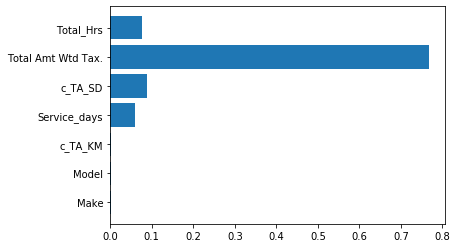

In [89]:
plt.barh(list(X),list(rfc.feature_importances_))

In [90]:
score=cross_val_score(estimator=rfc,X=X,y=y,cv=5)

In [91]:
score.mean()

0.9381702024847666

### XgBoost Classifier

In [93]:
from xgboost import XGBClassifier

In [94]:
xgb=XGBClassifier()

In [95]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
y_pred_xgb=xgb.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred_xgb)

0.9404448866462938

In [98]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3600
           1       0.99      0.92      0.95      6963
           2       0.85      0.93      0.89      3508

    accuracy                           0.94     14071
   macro avg       0.93      0.95      0.94     14071
weighted avg       0.94      0.94      0.94     14071



In [99]:
scores_xgb=cross_val_score(estimator=xgb,X=X,y=y,cv=5)

In [100]:
scores_xgb.mean()

0.9411763876946756